Code in this notebook is based on <https://github.com/MBMS80/Writing-Cifar10-dataset-to-image-files-as-.tif-or-.jpg->  
( original author:
[Mehdi Maboudi](https://www.tu-braunschweig.de/igp/mitarbeiter/maboudi/), September 2019,
 Technical University of Braunschweig )
 
Implements:
- Writing Cifar10 dataset to image files as '.tif' or '.jpg'  
- Reading image files into numpy arrays compatible with the standard Cifar10 dataset

In [1]:
import os
import glob
import pickle
from pathlib import Path

In [2]:
!pip install numpy
!pip install matplotlib
!pip install tqdm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
!pip install imageio
import imageio #Python library for reading and writing image data

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='iso-8859-1')
    return dict

In [5]:
!pip install torch
!pip install torchvision
import torchvision

cifar10 = torchvision.datasets.CIFAR10('./data', train=True, download=True)
cifar10_val = torchvision.datasets.CIFAR10('./data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.  
There are 50000 training images and 10000 test images.  
***
__png__ images of CIFAR-10 will be saved in 10 subdirectories of each label under the __test__ and __train__ directories as below.


In [7]:
cifar10_val

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


In [8]:
# Load cifar10 from local files
DATA_DIR   = './data/'
CIFAR10_DIR   = DATA_DIR + 'cifar-10-batches-py/'

In [9]:
training_batch_pickle_files = sorted(glob.glob(CIFAR10_DIR + 'data_batch_*'))
test_batch_pickle_file = CIFAR10_DIR + 'test_batch'
meta_data_pickle_file  = CIFAR10_DIR + 'batches.meta'

print(training_batch_pickle_files)

['./data/cifar-10-batches-py/data_batch_1', './data/cifar-10-batches-py/data_batch_2', './data/cifar-10-batches-py/data_batch_3', './data/cifar-10-batches-py/data_batch_4', './data/cifar-10-batches-py/data_batch_5']


In [10]:
meta_data = unpickle(meta_data_pickle_file)
# print(meta_data)
# {'num_cases_per_batch': 10000,
# 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
# 'num_vis': 3072}

In [11]:
# class_names = ['airplane',
# 'automobile',
# 'bird',
# 'cat',
# 'deer',
# 'dog',
# 'frog',
# 'horse',
# 'ship',
# 'truck']
# nb_classes = len(class_names)

In [12]:
class_names = meta_data['label_names']
nb_classes = len(class_names)
print(nb_classes, class_names)

10 ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [13]:
cifar_data = []
for pickle_file in training_batch_pickle_files:
    data_dict = unpickle(pickle_file)
    print(f"{data_dict['batch_label']}: len={len(data_dict['labels'])} {data_dict.keys()}")
    assert(len(data_dict['labels']) == len(data_dict['data']))
    assert(len(data_dict['labels']) == len(data_dict['filenames']))
    cifar_data.append(data_dict)
    
print()
test_batch = unpickle(test_batch_pickle_file)
print(f"{test_batch['batch_label']}: len={len(test_batch['labels'])} {test_batch.keys()}")


training batch 1 of 5: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])
training batch 2 of 5: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])
training batch 3 of 5: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])
training batch 4 of 5: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])
training batch 5 of 5: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])

testing batch 1 of 1: len=10000 dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [14]:
print(data_dict['batch_label'], len(data_dict['filenames']), data_dict['filenames'][0:5])
cifar10_batch5 = cifar_data[4]['data'] 
print("dtype:", cifar10_batch5.dtype, "shape:", cifar10_batch5.shape)
print(cifar10_batch5)


training batch 5 of 5 10000 ['compact_car_s_001706.png', 'icebreaker_s_001689.png', 'peke_s_000545.png', 'convertible_s_000520.png', 'domestic_dog_s_000455.png']
dtype: uint8 shape: (10000, 3072)
[[255 252 253 ... 173 231 248]
 [127 126 127 ... 102 108 112]
 [116  64  19 ...   7   6   5]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]


In [15]:
def reshape_cifar_img_data(imgdata_batch):
    reshaped = np.reshape(imgdata_batch, (imgdata_batch.shape[0], 3, 32, 32))
    # print(reshaped.shape, end=' ')
    reshaped = np.transpose(reshaped, axes=(0,2,3,1))
    # print("->", reshaped.shape)
    return reshaped

def reshape_cifar_img(imgdata):
    reshaped = np.reshape(imgdata, (3, 32, 32))
    # print(reshaped.shape, end=' ')
    reshaped = np.transpose(reshaped, axes=(1,2,0))
    # print("->", reshaped.shape)
    return reshaped


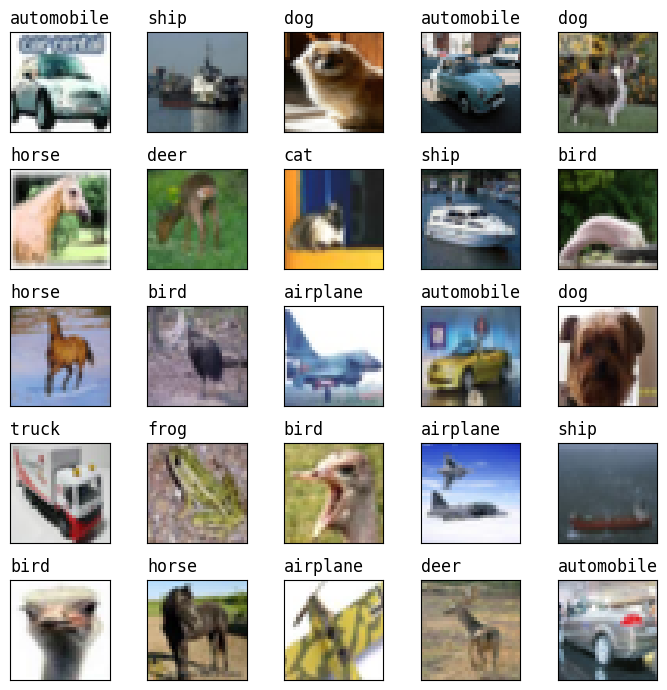

In [16]:
# VISUALIZE IMAGES

def plotImages_categories( images, labels, n_rows=5, n_cols=4, figsize=(10, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    for i in range(len(axes)):
        # y_train[0].astype(int)
        axes[i].imshow(images[i])        
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        
        class_index = labels[i]
        title = class_names[class_index]
        axes[i].set_title(title, fontdict={'family':'monospace'}, loc='left')
    plt.tight_layout()
    plt.show()

#train_labels =np.ravel(y_train)
reshaped_batch5 = reshape_cifar_img_data(cifar_data[4]['data'])
# print(reshaped_batch5[0])
plotImages_categories(images=reshaped_batch5, labels=cifar_data[4]['labels'], n_rows=5, n_cols=5, figsize=(7, 7))

### Helper function to make directories and write images

In [17]:
IMAGES_DIR = DATA_DIR +'Cifar10_images'
im_format = '.png'  # '.tif'


In [18]:
def make_directories(images_dir,split):
    for dir_name in class_names:
        dir_full_path = os.path.join(images_dir+'/'+split,dir_name)
        if not os.path.exists(dir_full_path):
            os.makedirs(dir_full_path)

def write_images_to_split_directory(batch,split,path,write_data=False,class_counter=None):
    if class_counter is None:
        class_counter=np.zeros(nb_classes,dtype=int)

    if write_data:
        make_directories(path,split=split)
    images,labels = reshape_cifar_img_data(batch['data']), batch['labels']
    filenames = batch['filenames']
    n_images = images.shape[0]       # number of images: one data tuple per image
    assert n_images==len(labels)     # each image has a class label
    assert n_images==len(filenames)  # each image has a filename
    for i in range(n_images):
        class_index = labels[i]
        class_  = class_names[class_index]
        destination_dir = os.path.join(path,split,class_)
        filename = Path(filenames[i]).stem
        outputname = f"{class_counter[class_index]:04d}_{filename}{im_format}"
        # if i % 200 == 0:
        #     print(destination_dir, outputname)
        if write_data:
            imageio.imwrite(destination_dir+'/'+outputname, images[i], im_format)
        class_counter[class_index] +=1 
        
    print('classnames',class_names)
    print('images/class = ',class_counter)
    return class_counter


In [19]:
class_counter=np.zeros(nb_classes,dtype=int)
WRITE_DATA = True 

def export_cifar10_to_image_dirs(train_data, test_data, data_dir=IMAGES_DIR,
                                 class_counter=None, write_data=WRITE_DATA):
    split = 'train'
    for batch in train_data:
        # train_labels = batch['labels'] #np.ravel(y_train)

        print(f"\nWriting {batch['batch_label']}: {len(batch['labels'])} images to {data_dir}/{split}")

        class_counter = write_images_to_split_directory(batch, split=split, path=data_dir,
                                        write_data=write_data, class_counter=class_counter)        

    split = 'test'
    print(f"\nWriting {test_data['batch_label']}: {len(test_data['labels'])} images to '{split}'")
    test_counter = write_images_to_split_directory(test_data, split=split, path=IMAGES_DIR,
                                        write_data=write_data, class_counter=None)        
    print()

In [20]:
export_cifar10_to_image_dirs(cifar_data, test_batch, data_dir=IMAGES_DIR)


Writing training batch 1 of 5: 10000 images to ./data/Cifar10_images/train
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images/class =  [1005  974 1032 1016  999  937 1030 1001 1025  981]

Writing training batch 2 of 5: 10000 images to ./data/Cifar10_images/train
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images/class =  [1989 1981 2042 2011 2009 1925 2038 2027 2012 1966]

Writing training batch 3 of 5: 10000 images to ./data/Cifar10_images/train
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images/class =  [2983 3023 3007 3008 2999 2954 3016 3042 2973 2995]

Writing training batch 4 of 5: 10000 images to ./data/Cifar10_images/train
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images/class =  [3986 3986 4048 3984 4003 3975 4020 4023 3997 3978]

Writing trainin

In [21]:
def reshape_imgdata(imgdata, flatten=0):
    assert len(imgdata.shape) == 3, imgdata.shape # (Width, Height, Channels=3)
    reshaped = np.transpose(imgdata,axes=(2,0,1))
    if flatten == 1:
        outshape = (imgdata.shape[2]*imgdata.shape[0]*imgdata.shape[1],) # completely flatten to 1D
    elif flatten == 2:
        outshape = (imgdata.shape[2],imgdata.shape[0]*imgdata.shape[1]) # C=3 channels, W x H values 
    elif flatten:
        assert False, f"Unsupported arg: flatten={flatten}"
        flatten = 0
    if flatten:
        reshaped = np.reshape(reshaped,outshape)
    return reshaped

horse
./data/Cifar10_images/train/horse/0000_*.png
./data/Cifar10_images/train/horse/0000_cow_pony_s_001168.png
(32, 32, 3)
(3, 32, 32)
(3072,)


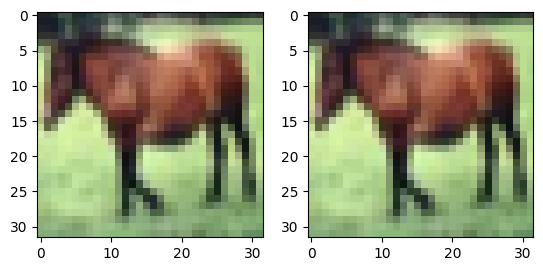

sample min & max: 9 248
source min & max: 9 248

sample patch:
 [[35 34 44 83 84]
 [30 28 31 58 78]
 [36 33 30 54 95]
 [52 50 47 61 89]
 [95 87 74 47 43]]
source patch:
 [[35 34 44 83 84]
 [30 28 31 58 78]
 [36 33 30 54 95]
 [52 50 47 61 89]
 [95 87 74 47 43]]


In [22]:
# Check results visually
sample_idx = 7 # 0, 1, 3, 4, 6, 7  (assumption: first image in a given class) 
sample_class = cifar_data[0]['labels'][sample_idx]
sample_origdata = cifar_data[0]['data'][sample_idx]
print(class_names[sample_class])
filepattern = f"{IMAGES_DIR}/train/{class_names[sample_class]}/0000_*{im_format}"
print(filepattern)
sample_file = glob.glob(filepattern)[0]
print(sample_file)


#sample  = imageio.imread('data/Cifar10_images/train/frog/0000'+im_format)
sample  = imageio.v2.imread(sample_file)
print(sample.shape)
plt.subplot(1,2,1)
plt.imshow(sample)
reshaped_sample = reshape_imgdata(sample)
print(reshaped_sample.shape)

plt.subplot(1,2,2)
print(sample_origdata.shape)
sample_img = reshape_cifar_img(sample_origdata)
plt.imshow(sample_img)
plt.show()

# Check results numerically
print('sample min & max:',sample.min(),sample.max())
print('source min & max:',sample_origdata.min(),sample_origdata.max())
print('\nsample patch:\n',sample[0:5,0:5,1])
print('source patch:\n',sample_img[0:5,0:5,1])

In [23]:
IMAGES_DIR

'./data/Cifar10_images'

In [24]:
def read_image_data_(data_path, split, class_labels=None):
    class_counter = None
    class_names = []
    # for dir_name in class_names:
    dir_full_path = os.path.join(data_path+'/'+split)
    if not os.path.exists(dir_full_path):
        assert False, "Path does not exist: "+dir_full_path
    img_dirs = sorted([f for f in Path(dir_full_path).iterdir() if f.is_dir()])
    class_labels = [f.name for f in img_dirs]
    print("class_labels (from directory names):", class_labels)
    nb_classes = len(class_labels)
    if nb_classes > 0:
        class_counter=np.zeros(nb_classes,dtype=int)

    img_tensors = []
    for iclass, imgdir in enumerate(img_dirs):
        img_files = sorted(imgdir.glob('*'+im_format)) # list all images 
        img_file_names = list(map(lambda f: f.stem, img_files)) # list all images 
        print(img_file_names[0:5])
        # imgrecs = [reshape_imgdata(imageio.v2.imread(f), flatten=0) for f in img_files]
        imgrecs = [imageio.v2.imread(f) for f in img_files]
        npdata = np.stack(imgrecs)  # one row per image
        assert npdata.shape[0] == len(imgrecs) # by def of np.stack()
        print(npdata.shape)
        class_counter[iclass] = len(imgrecs)
        img_tensors.append(npdata)  # python list of 2D nparray: num_recs x flattened_img_data
        # (one list entry per class label)
        
    print()
    print('classnames',class_labels)
    print('images/class = ',class_counter)
    return img_tensors, class_labels, class_counter

In [25]:
data, _labels, class_counts = read_image_data_(IMAGES_DIR, 'train', class_labels=None)

class_labels (from directory names): ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
['0000_stealth_bomber_s_000554', '0001_twinjet_s_000663', '0002_monoplane_s_000895', '0003_dive_bomber_s_001390', '0004_attack_aircraft_s_000153']
(5000, 32, 32, 3)
['0000_station_wagon_s_000293', '0001_coupe_s_001735', '0002_auto_s_000609', '0003_station_waggon_s_000041', '0004_coupe_s_001944']
(5000, 32, 32, 3)
['0000_cassowary_s_001300', '0001_passerine_s_000343', '0002_accentor_s_000677', '0003_cassowary_s_001246', '0004_ostrich_s_001368']
(5000, 32, 32, 3)
['0000_tabby_s_001355', '0001_alley_cat_s_000200', '0002_tomcat_s_000772', '0003_cat_s_000081', '0004_tabby_cat_s_000983']
(5000, 32, 32, 3)
['0000_american_elk_s_001521', '0001_muntjac_s_001000', '0002_capreolus_capreolus_s_000051', '0003_alces_alces_s_000959', '0004_wapiti_s_000416']
(5000, 32, 32, 3)
['0000_chihuahua_s_000825', '0001_pekinese_s_001337', '0002_pekinese_s_001093', '0003_puppy_s_000115'

In [26]:
validation_data, _labels, class_counts = read_image_data_(IMAGES_DIR, 'test', class_labels=None)


class_labels (from directory names): ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
['0000_jetliner_s_001705', '0001_plane_s_000026', '0002_stealth_fighter_s_000354', '0003_dive_bomber_s_000184', '0004_biplane_s_000278']
(1000, 32, 32, 3)
['0000_shooting_brake_s_000973', '0001_wagon_s_002806', '0002_automobile_s_001582', '0003_police_cruiser_s_000689', '0004_auto_s_000935']
(1000, 32, 32, 3)
['0000_gamecock_s_000228', '0001_struthio_camelus_s_001480', '0002_dunnock_s_000264', '0003_pipit_s_000291', '0004_bird_s_000650']
(1000, 32, 32, 3)
['0000_domestic_cat_s_000907', '0001_tabby_cat_s_001397', '0002_tomcat_s_002930', '0003_house_cat_s_000481', '0004_domestic_cat_s_000539']
(1000, 32, 32, 3)
['0000_wapiti_s_001434', '0001_elk_s_000015', '0002_deer_s_001275', '0003_barking_deer_s_000257', '0004_rangifer_tarandus_s_001009']
(1000, 32, 32, 3)
['0000_toy_spaniel_s_001592', '0001_puppy_s_001937', '0002_puppy_s_001691', '0003_pekingese_s_000608', '

In [27]:
import torch
from torchvision.transforms import v2

transform_to_normalized_tensors=v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.4915, 0.4823, 0.4468),
                         std=(0.2470, 0.2435, 0.2616))
])

In [28]:
# cifar10x = datasets.CIFAR10(
#     data_path, train=True, download=False, transform=transform_to_normalized_tensors
# )

# cifar10x_val = datasets.CIFAR10(
#     data_path, train=False, download=False,
#     transform=transform_to_normalized_tensors
# )

In [29]:
label_map = {0: 0, 1: 2}
cifar2_class_names = ['airplane', 'bird']
cifar2 = []
cifar2_val = []
for i, cifar10_class_idx in label_map.items():
    assert cifar10_class_idx == label_map[i]
    print(class_names[cifar10_class_idx])
    assert class_names[cifar10_class_idx] == cifar2_class_names[i]
    # transformed_val_data = transform_to_normalized_tensors(validation_data[cifar10_class_idx])
    for img in data[cifar10_class_idx]:
        cifar2.append((transform_to_normalized_tensors(img),i))
    for img in validation_data[cifar10_class_idx]:
        cifar2_val.append((transform_to_normalized_tensors(img),i))

print(len(cifar2), cifar2[0][0].shape, cifar2[0][0].dtype)
print(len(cifar2_val), cifar2_val[0][0].shape, cifar2_val[0][0].dtype)

airplane
bird
10000 torch.Size([3, 32, 32]) torch.float32
2000 torch.Size([3, 32, 32]) torch.float32


In [30]:
def load_val_data(label_map=None, class_names=class_names):
    if label_map is None:
        label_map = {0:0, 1:1}
    _cifar2_valX = []
    counts = {}
    for i, cifar10_class_idx in label_map.items():
        class_name = class_names[cifar10_class_idx]
        counts[class_name] = 0
        # print(class_name)
        for img in validation_data[cifar10_class_idx]:
            _cifar2_valX.append((transform_to_normalized_tensors(img),i))
            counts[class_name] += 1

    # print(len(_cifar2_valX), _cifar2_valX[0][0].shape, _cifar2_valX[0][0].dtype)
    print(counts)
    return _cifar2_valX

In [31]:
label_map = {0: 2, 1: 0}
cifar2_valSWAPPED = load_val_data(label_map=label_map)

{'bird': 1000, 'airplane': 1000}


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = x.view(-1,32*32*3)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.327553
Epoch: 1, Loss: 0.433683
Epoch: 2, Loss: 0.351741
Epoch: 3, Loss: 0.450312
Epoch: 4, Loss: 0.383749
Epoch: 5, Loss: 0.514716
Epoch: 6, Loss: 0.162242
Epoch: 7, Loss: 0.420106
Epoch: 8, Loss: 0.879580
Epoch: 9, Loss: 0.374553
Epoch: 10, Loss: 0.628253
Epoch: 11, Loss: 0.495858
Epoch: 12, Loss: 0.370941
Epoch: 13, Loss: 0.590177
Epoch: 14, Loss: 0.330566
Epoch: 15, Loss: 0.361884
Epoch: 16, Loss: 0.377845
Epoch: 17, Loss: 0.399121
Epoch: 18, Loss: 0.221721
Epoch: 19, Loss: 0.274844
Epoch: 20, Loss: 0.306525
Epoch: 21, Loss: 0.130822
Epoch: 22, Loss: 0.281880
Epoch: 23, Loss: 0.160290
Epoch: 24, Loss: 0.231278
Epoch: 25, Loss: 0.316624
Epoch: 26, Loss: 0.467352
Epoch: 27, Loss: 0.311170
Epoch: 28, Loss: 0.218247
Epoch: 29, Loss: 0.412480
Epoch: 30, Loss: 0.240268
Epoch: 31, Loss: 0.344911
Epoch: 32, Loss: 0.406650
Epoch: 33, Loss: 0.225344
Epoch: 34, Loss: 0.294759
Epoch: 35, Loss: 0.161024
Epoch: 36, Loss: 0.350893
Epoch: 37, Loss: 0.287962
Epoch: 38, Loss: 0.295

In [33]:
def eval_accuracy(model, val_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for imgs, labels in val_loader:
            outputs = model(imgs)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
            
    print(f"Accuracy (correct: {correct} / total: {total}) = {correct/total}" )
    return correct, total

In [34]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)

Accuracy (correct: 1559 / total: 2000) = 0.7795


(1559, 2000)

In [35]:
label_map = {1: 2}
cifar2_valBird = load_val_data(label_map=label_map)
val_loader = torch.utils.data.DataLoader(cifar2_valBird, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


{'bird': 1000}
Accuracy (correct: 800 / total: 1000) = 0.8


(800, 1000)

In [36]:
label_map = {0: 0}
cifar2_valAirplane = load_val_data(label_map=label_map)
val_loader = torch.utils.data.DataLoader(cifar2_valAirplane, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


{'airplane': 1000}
Accuracy (correct: 759 / total: 1000) = 0.759


(759, 1000)

In [37]:
val_loader = torch.utils.data.DataLoader(cifar2_valSWAPPED, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


Accuracy (correct: 441 / total: 2000) = 0.2205


(441, 2000)

In [38]:
label_map = {0: 0, 1: 5}
cifar2_valAirplaneDog = load_val_data(label_map=label_map)
val_loader = torch.utils.data.DataLoader(cifar2_valAirplaneDog, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


{'airplane': 1000, 'dog': 1000}
Accuracy (correct: 1455 / total: 2000) = 0.7275


(1455, 2000)

In [39]:
label_map = {0: 5, 1: 2}
cifar2_valDogBird = load_val_data(label_map=label_map)
val_loader = torch.utils.data.DataLoader(cifar2_valDogBird, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


{'dog': 1000, 'bird': 1000}
Accuracy (correct: 1104 / total: 2000) = 0.552


(1104, 2000)

In [40]:
label_map = {0: 5} #, 1: 2}
cifar2_valDog = load_val_data(label_map=label_map)
val_loader = torch.utils.data.DataLoader(cifar2_valDog, batch_size=64, shuffle=False)
eval_accuracy(model, val_loader)


{'dog': 1000}
Accuracy (correct: 304 / total: 1000) = 0.304


(304, 1000)